# MDS

## MDS(Multidimensional Scaling)
PCA와 달리 원본 데이터 필드 상에서의 레코드들 간의 거리를 저차원에서도 최대한 보존하는 것을 목적으로 한다. 고차원 상에서 뒤틀린 상태로 놓여있는 매니폴드로부터 개체간 거리를 동일하게 유지되는 저차원 공간으로 맵핑하는 것이 핵심이다. MDS에서는 데이터의 특징이 다른 객체간의 pairwise distance가 되며 distance는 Euclidean distance를 사용합니다. 

## Procedure
1. 기존의 데이터를 Euclidean distance를 이용해 distance matrix로 변환
2. Distance matrix D를 이용해 inner product B 계산
3. Eigen-decomposition 고유벡터 구하기
4. 원하는 차원으로 축소


In [4]:
import warnings
warnings.filterwarnings('ignore')

In [21]:
import pandas as pd 
import numpy as np 
from tqdm import tqdm 
from sklearn import datasets
import matplotlib.pyplot as plt


In [14]:
digits = datasets.load_digits(n_class=5)
X = digits.data
y = digits.target

In [27]:
# step1 D-matrix 구하기
dists = np.zeros((len(X),len(X)))

for i in range(len(X)):
    for j in range(len(X)):
        dists[i,j] = (np.sum((X[i,:]-X[j,:])**2))

In [16]:
# step2 HDH 계산을 통한 centering
n = len(dists)
H = np.eye(n)-(1/n)*(np.ones((n,n)))
B = -H.dot(dists).dot(H)/2

In [17]:
# step3 Eigen-decomposotion, eigenvector 구하기
eigen_value,eigen_vector = np.linalg.eig(B)
inverseEigenVectors = np.linalg.inv(eigen_vector) 
diagonal= inverseEigenVectors.dot(B).dot(eigen_vector)

In [18]:
# step4 원하는 차원으로 축소
dimension = 2
B_1 = eigen_vector[:,0:dimension].dot(diagonal[0:dimension,0:dimension]).dot(eigen_vector[:,0:dimension].T)
diagonal[diagonal<1] = 0
coordinate_X = eigen_vector[:,0:dimension].dot(np.sqrt(diagonal[0:dimension,0:dimension]))


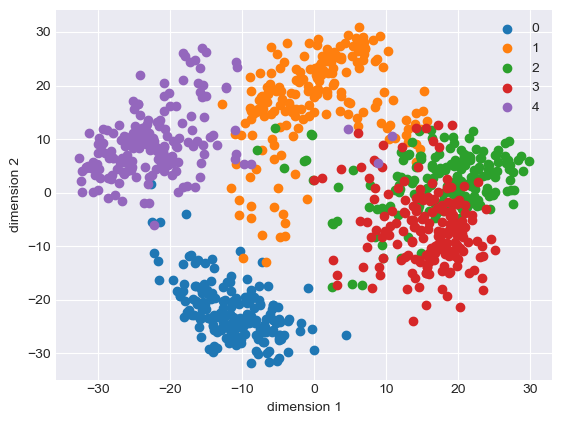

In [26]:
with plt.style.context("seaborn-darkgrid"):
    for l in label:
        plt.scatter(coordinate_X[y==l,0], coordinate_X[y==l,1],label=l)
    plt.xlabel("dimension 1")
    plt.ylabel("dimension 2")
    plt.legend()
    plt.show()